In [49]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [55]:
df = pd.read_csv('synthetic_traffic_data.csv')

In [56]:
# drop timeStamp and dateStamp
df.drop(['timeStamp', 'dateStamp'], axis=1, inplace=True)

In [57]:
# Convert all str columns in df to numeric (float)
for col in df.columns:
    if df[col].dtype == 'str':
        df[col] = pd.to_numeric(df[col], errors='coerce', inplace=True)

In [58]:
# replace Nans with 0 and inf with 1e9
df.fillna(0, inplace=True)

In [59]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

TrafficID: int64
greenTime: int64
isWeekDay: int64
isWeekend: int64
isPublicHoliday: int64
sinTime: float64
cosTime: float64
avg_num_cars_signal_0: float64
avg_num_cars_signal_1: float64
avg_num_cars_signal_2: float64
avg_num_cars_signal_3: float64
avg_num_cars_signal_4: float64
avg_num_cars_signal_5: float64
avg_num_cars_signal_6: float64
avg_num_cars_signal_7: float64
avg_num_cars_signal_8: float64
avg_num_cars_signal_9: float64
avg_num_cars_signal_10: float64
avg_num_cars_signal_11: float64
avg_num_cars_signal_12: float64
avg_num_cars_signal_13: float64
avg_num_cars_signal_14: float64
avg_num_cars_signal_15: float64


In [46]:
# Normalize the 

In [47]:
# Define the model
model = xgb.XGBRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.7, 
                         learning_rate = 0.05,
                         max_depth = 7, 
                         alpha = 5, 
                         n_estimators = 100)

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.710554284325184


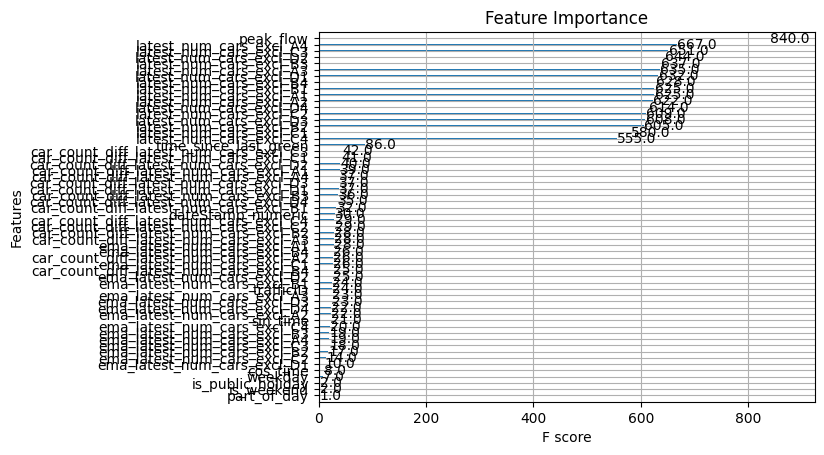

In [48]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming 'model' is your trained XGBoost model
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()
